In [1]:
import pandas as pd
import numpy as np
#plotting library
import matplotlib.pyplot as plt
#for displlaying inline plots
%matplotlib inline
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
#importing dataset, assuming header is present
dataset=pd.read_csv(url)

In [2]:
#priting first five coloumns of the dataset
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


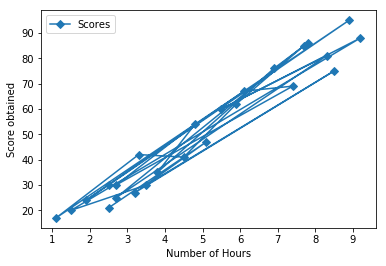

In [3]:
#Plotting the dataset to see relationship between the two variables
dataset.plot(x="Hours", y="Scores", style="D-")
plt.title=("Dataset Plot")
plt.xlabel("Number of Hours")
plt.ylabel("Score obtained")
plt.show()

Plot Result: The relation between the two variables 'Hours' and 'Scores' is direct linear.

In [4]:
#defining attributes (inputs): it will select values till the second last column of the data frame
X=dataset.iloc[:,:-1].values
#defining labels (outputs): it will select values for second column of data frame
Y=dataset.iloc[:, 1].values
#splitting data into training and test sets
#importing train_test_split() function from scikit learn library: it is used to avoid miscalculations resutling from use of
#same data set for testing & training
#test_size is size of testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=0)
#Training the algorithm
#importing Linear Regression model
from sklearn.linear_model import LinearRegression
# regressor is feature or independent value that will predict the outcome
regressor= LinearRegression()
#fit() method takes training data as argument; two arrays in case of supervised learning
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

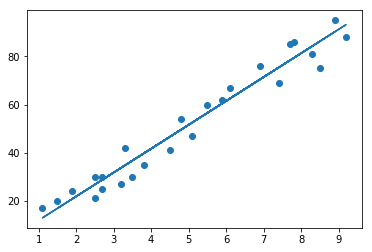

In [5]:
#plotting regression line
line = regressor.coef_*X+regressor.intercept_
#plotting points
plt.scatter(X, Y)
#plotting line
plt.plot(X,line)
plt.show()

In [6]:
#predicting throough model
#testing data printing
print (X_test)
#making the prediction of scores
pred=regressor.predict(X_test)
# Comparison of Actual and Predicted values
df = pd.DataFrame({'Actual': Y_test, 'Prediction': pred})  
df

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


,Actual,Prediction
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [11]:
#testing data
hour=9.25
#passing the argument value for testing mmodel for 9.25 hours
testing_prediction=regressor.predict(hour)
print("Score Prediction if student studies 9.25 hours a day = {}".format(testing_prediction[0]))

Score Prediction if student studies 9.25 hours a day = 93.69173248737538


In [19]:
#importing library to find 
from sklearn import metrics
#the mean absolute error is the average of the absolute error (without direction)
print('Mean Absolute Error', metrics.mean_absolute_error(Y_test, pred))
#another method for evaluating model is R-squared suggest proportion of variance or scatter around the line of best fit.
from sklearn.metrics import r2_score
metrics.r2_score(Y_test, pred)

Mean Absolute Error 4.183859899002975


0.9454906892105356

The data ranges from 1.1 to 9.2, so in comparison 4.13 is a small value.
The R² value is 0.94, which means 94% of the variation can be explained by the model’s inputs.